In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import plotly.express as px
from dateutil.parser import parse 
import datetime
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display

In [3]:
df = pd.read_excel(r'C:\Users\shiwi\OneDrive\Desktop\terrorist_data.xlsx')

In [27]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['Casualities']=df['Killed']+df['Wounded']
df=df

In [29]:
df_us['Group'].replace('White extremists', 'White Supremacists', inplace = True)

In [28]:
# Filter data to terrorist attacks in the U.S. only
df_us = df[df['Country'] == 'United States']

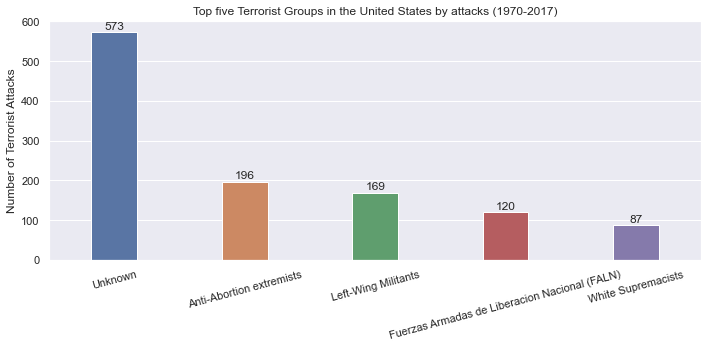

In [9]:
# Plot shwoing top 5 terrorist groups by attack count (1970-2018)
ax = sns.barplot(df_us['Group'].value_counts().head(5).index, y = df_us['Group'].value_counts().head(5))


# Set labels
ax.set(ylabel = "Number of Terrorist Attacks", title = 'Top five Terrorist Groups in the United States by attacks (1970-2017)')
plt.xticks(rotation= 15)
# Format plot
for p in ax.patches:
    ax.annotate(str(int((p.get_height()))), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 6), 
                   textcoords = 'offset points')
    sns.set(rc={'figure.figsize':(10,5)})

    plt.tight_layout()
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35) 

plt.show()

In [137]:
UnkMot= df_us[df_us['Group'] == 'Unknown']

UnkMot = UnkMot[UnkMot['Motive'].notnull()]

print(UnkMot['Motive'].head(70).unique())

['Protest non-local companies from working in East St. Louis'
 'Protest "river-saving" legislation in St. Charles Missouri.'
 "Protest William G. Barr 's position on mental health legislation"
 'To protest the reporting of the Akron Beacon Journal'
 'Two different motives suspected.  Either Black radicals punishing the Churches for not allowing expelled Black students to temporarily use their facilities for classes or White racists trying to intimidate the African American community of Texarkana Texas.'
 'Two different motives suspected.   Either Black radicals punishing the Churches for not allowing expelled Black students to temporarily use their facilities for classes or White racists trying to intimidate the African American community of Texarkana Texas.'
 'To protest members of the Puerto Rican Independence movement' 'Unknown'
 "Motive is unknown; however, the campus had been involved in ongoing disputes between university administration and student advocates for Puerto Rico's ind

In [118]:
AAEMot = df_us[df_us['Group'] == 'Anti-Abortion extremists']

AAEMot = AAEMot[AAEMot['Motive'].notnull()]

print(AAEMot['Motive'].head(20).unique())

['To protest the practice of abortion and to sabotage abortion facilities operating in Minnesota.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Vermont.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Nebraska.'
 'To protest the practice of abortion and to sabotage a clinic offering advise on family planning in Ohio.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Ohio.'
 'To protest pro-abortion activist Bill Baird and to sabotage abortion facilities operating in New York.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Illinois.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Colorado.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in New Jersey.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Virginia.'
 'To

In [119]:
LeMot = df_us[df_us['Group'] == 'Left-Wing Militants']

LeMot = LeMot[LeMot['Motive'].notnull()]

print(LeMot['Motive'].head(20).unique())

['Protest the draft and Vietnam War' 'Protest and sabotage the draft'
 'To intimidate the police.' 'Protest the draft.'
 'Protest the War in Vietnam and sabotage the draft'
 'Sabotage the US Army war efforts and protest the Vietnam War'
 'To disrupt the trial of H. Rap Brown'
 'Protest the Vietnam War and sabotage the US Army'
 'To impede the US war effort and protest the Vietnam War'
 'To protest against the draft.'
 'To protest the trial of Lt. William Calley and show sympathy for the defendant'
 'Revolutionary movement against the financial establishment'
 'Protest the Vietnam War'
 'Bank of America was perceived to symbolize the "capitalist exploitation of the little man."'
 'Protest the Vietnam War and US military'
 "Protest the University of Pennsylvania's policies towards minorities"]


In [30]:
FALNMot = df_us[df_us['Group'] == 'Fuerzas Armadas de Liberacion Nacional (FALN)']

FALNMot = FALNMot[FALNMot['Motive'].notnull()]

print(FALNMot['Motive'].head(20).unique())

['To protest United States presence in Puerto Rico'
 'The specific motive is unclear; however the incident occurred in conjunction with strikes against the Aqueduct and Sewers Authority, a government-owned water company.  According to sources, the striking Aqueduct and Sewers Authority Workers Union was receiving support from Puerto Rican socialists who were attempting to obtain independence from the United States and the United Labor Movement.'
 'The specific motive is unclear; however, it is suspected that the attempted bombing was in an effort to protest the visits of Vice President Rockefeller and Secretary of State Kissinger by Puerto Rican Nationalists.'
 'The specific motive is unclear; however, it is suspected that the bombing was in an effort to protest the visits of Vice President Rockefeller and Secretary of State Kissinger by Puerto Rican Nationalists.'
 'Unknown'
 "Unknown; however, this incident occurred in conjunction with Chicago's Puerto Rican Day parade."
 'Unknown; b

In [120]:
WhiSupMot = df_us[df_us['Group'] == 'White Supremacists']

WhiSupMot = WhiSupMot[WhiSupMot['Motive'].notnull()]

print(WhiSupMot['Motive'].head(20).unique())

['Intimidate the Black Panther Party.'
 'The motive of the attack was to prevent the African American community of West Point Mississippi from organizing.'
 'To intimidate/show dissatisfaction with White sympathizers of the African American cause.'
 'Suspected motive was to protest school integration.'
 'To intimidate the African American community at Cornell University'
 'Protest the desegregation of Denver City Schools.'
 'Protest the R.O.T.C. program and Vietnam War'
 'To protest African Americans sitting on the San Bernardino city council'
 'Protest the Vietnam War and sabotage the US Army'
 'To protest the civil rights movement'
 'Suspected motive was to protest the Vietnam War.'
 'To protest African Americans from moving into  a white neighborhood in Longview Texas'
 'To prevent the busing of African American students to the desegregated school in the Longview School District'
 'Intimidate the African American community of New Bedford Massachusetts.'
 'To scare the African Americ

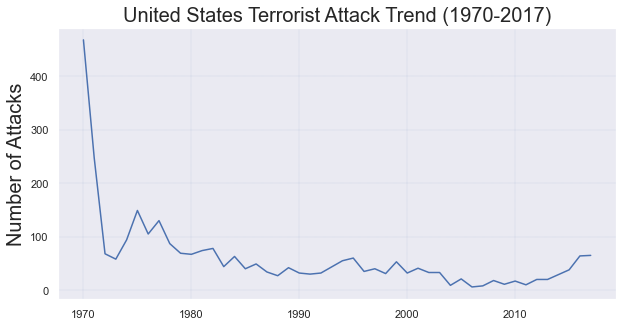

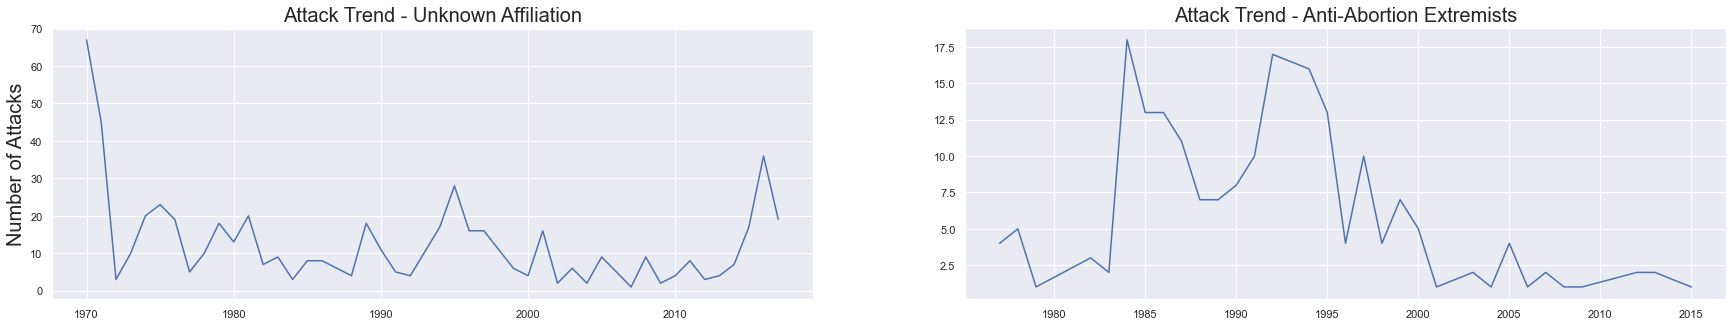

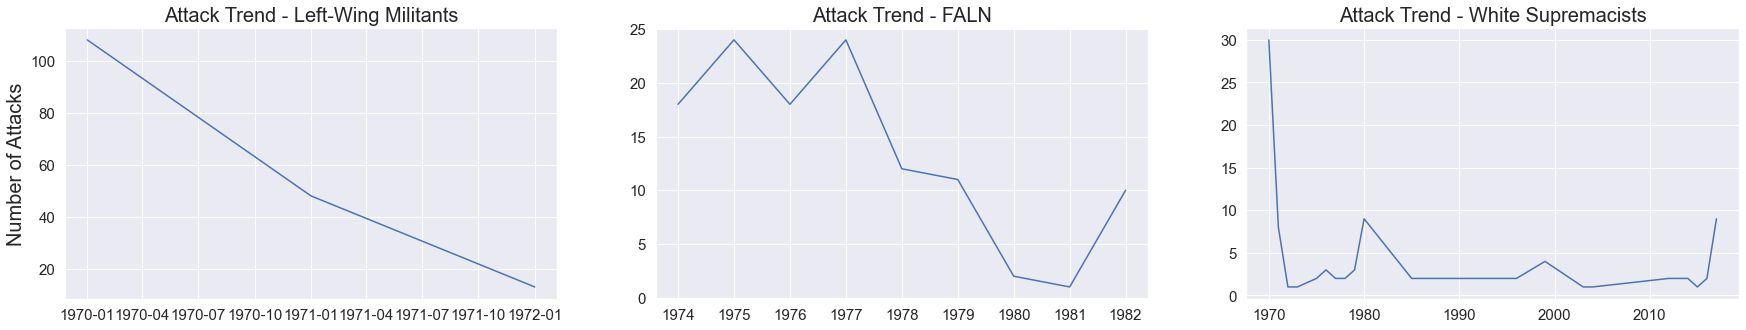

In [39]:
# Attack trend in United States
years_us = df_us['Year'].value_counts()
YearList = sorted(list(zip(years_us.index, years_us.values)))
AttackYears, AttackCount = zip(*YearList)
AttackYears, AttackCount = list(AttackYears), list(AttackCount)

sns.lineplot( x=AttackYears, y= AttackCount);

plt.title('United States Terrorist Attack Trend (1970-2017)', size = 20)
plt.ylabel('Number of Attacks', size = 20)
plt.grid(color='b', linestyle='--', linewidth=0.1)
figsize = (30, 5);


fig, axes = plt.subplots(1, 2, figsize=(30, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 

# Attack trend of terrorists with unknown group affiliation
# Prepare data for plotting 
df_us_unk = df_us[df_us['Group'] == 'Unknown']
years_us1 = df_us_unk['Year'].value_counts()
YearList1 = sorted(list(zip(years_us1.index, years_us1.values)))
AttackYears1, AttackCount1 = zip(*YearList1)
AttackYears1, AttackCount1 = list(AttackYears1), list(AttackCount1)

axes[0].plot(AttackYears1, AttackCount1)
axes[0].set_title("Attack Trend - Unknown Affiliation", size = 20)
axes[0].set_ylabel('Number of Attacks', size = 20)


# Attack trend of Anti-Abortion extremists
# Prepare data for plotting
df_us_AAE = df_us[df_us['Group'] == 'Anti-Abortion extremists']
years_us2 = df_us_AAE['Year'].value_counts()
YearList2 = sorted(list(zip(years_us2.index, years_us2.values)))
AttackYears2, AttackCount2 = zip(*YearList2)
AttackYears2, AttackCount2 = list(AttackYears2), list(AttackCount2)

axes[1].plot (AttackYears2, AttackCount2)
axes[1].axis('tight')
axes[1].set_title("Attack Trend - Anti-Abortion Extremists", size = 20)
;

fig, axes = plt.subplots(1, 3, figsize=(30, 5))
plt.rcParams["axes.labelsize"] = 15
# Attack trend of Left-Wing militants in te U.S.
# Prepare data for plotting
df_us_lwe = df_us[df_us['Group'] == 'Left-Wing Militants']
date_lwe = pd.to_datetime(df_us_lwe['Year'], format="%Y")
years_us3 = date_lwe.value_counts()
YearList3 = sorted(list(zip(years_us3.index, years_us3.values)))
AttackYears3, AttackCount3 = zip(*YearList3)
AttackYears3, AttackCount3 = list(AttackYears3), list(AttackCount3)

axes[0].plot(AttackYears3, AttackCount3)
axes[0].set_title("Attack Trend - Left-Wing Militants", size = 20)
axes[0].set_ylabel('Number of Attacks', size = 20)

# Attack trend of FALN in the U.S.
# Prepare data for plotting
df_us_FALN = df_us[df_us['Group'] == 'Fuerzas Armadas de Liberacion Nacional (FALN)']
years_us4 = df_us_FALN['Year'].value_counts()
YearList4 = sorted(list(zip(years_us4.index, years_us4.values)))
AttackYears4, AttackCount4 = zip(*YearList4)
AttackYears4, AttackCount4 = list(AttackYears4), list(AttackCount4)

axes[1].plot (AttackYears4, AttackCount4)
axes[1].axis('tight')
axes[1].set_title("Attack Trend - FALN", size = 20)

# Attack trend of White extremists in the U.S.
# Prepare data for plotting
df_us_we = df_us[df_us['Group'] == 'White Supremacists']
years_us5 = df_us_we['Year'].value_counts()
YearList5 = sorted(list(zip(years_us5.index, years_us5.values)))
AttackYears5, AttackCount5 = zip(*YearList5)
AttackYears5, AttackCount5 = list(AttackYears5), list(AttackCount5)

axes[2].plot (AttackYears5, AttackCount5)
axes[2].axis('tight')
axes[2].set_title("Attack Trend - White Supremacists", size = 20);

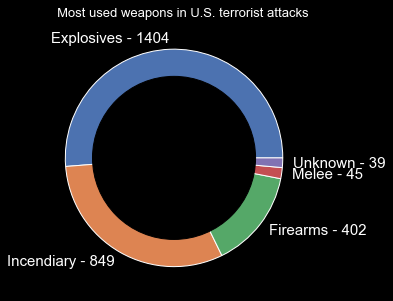

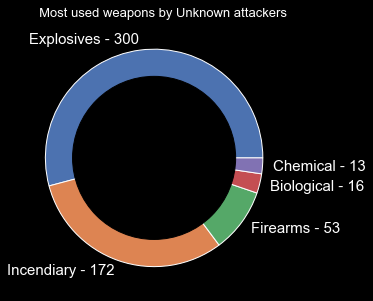

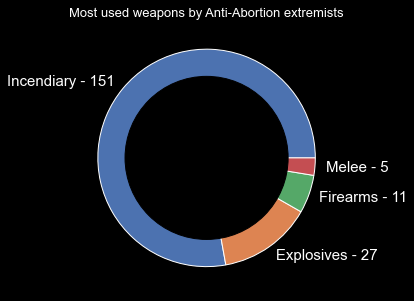

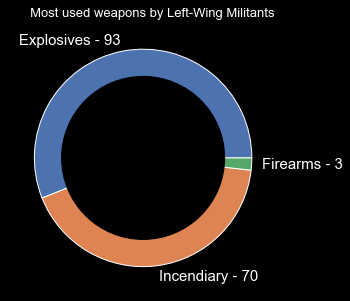

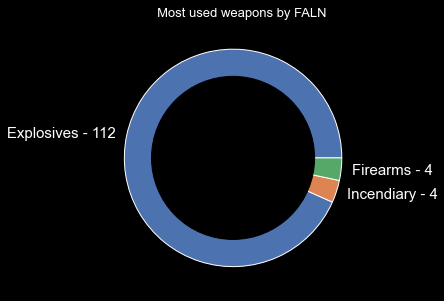

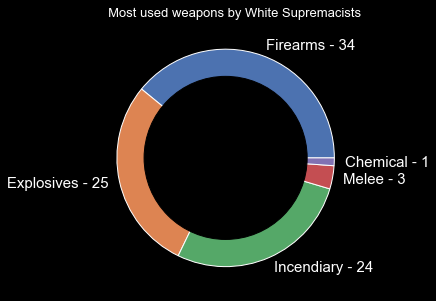

In [35]:
# Prepare data for donut plot
names = df_us['Weapon_type'].value_counts().head(5).index + ' - ' + df_us['Weapon_type'].value_counts().head(5).values.astype(str)
size = df_us['Weapon_type'].value_counts().head(5).values


fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('     Most used weapons in U.S. terrorist attacks', size = 13)

plt.show();

# Prepare data for donut plot
names = df_us_unk['Weapon_type'].value_counts().head(5).index + ' - ' + df_us_unk['Weapon_type'].value_counts().head(5).values.astype(str)
size = df_us_unk['Weapon_type'].value_counts().head(5).values


fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('     Most used weapons by Unknown attackers', size = 13)

plt.show();


# Prepare data for donut plot
names = df_us_AAE['Weapon_type'].value_counts().head(4).index + ' - ' + df_us_AAE['Weapon_type'].value_counts().head(4).values.astype(str)
size = df_us_AAE['Weapon_type'].value_counts().head(4).values


fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Most used weapons by Anti-Abortion extremists', size = 13)

plt.show();

# Prepare data for donut plot
names = df_us_lwe['Weapon_type'].value_counts().head(3).index + ' - ' + df_us_lwe['Weapon_type'].value_counts().head(3).values.astype(str)
size = df_us_lwe['Weapon_type'].value_counts().head(3).values


fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('     Most used weapons by Left-Wing Militants', size = 13)

plt.show();

# Prepare data for donut plot
names = df_us_FALN['Weapon_type'].value_counts().head(5).index + ' - ' + df_us_FALN['Weapon_type'].value_counts().head(5).values.astype(str)
size = df_us_FALN['Weapon_type'].value_counts().head(5).values


fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('     Most used weapons by FALN', size = 13)

plt.show();

# Prepare data for donut plot
names = df_us_we['Weapon_type'].value_counts().head(5).index + ' - ' + df_us_we['Weapon_type'].value_counts().head(5).values.astype(str)
size = df_us_we['Weapon_type'].value_counts().head(5).values
fig = plt.figure()
fig.patch.set_facecolor('black')
 

plt.rcParams['text.color'] = 'white'
 

my_circle=plt.Circle( (0,0), 0.75, color='black')


plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('     Most used weapons by White Supremacists', size = 13)

plt.show();


In [36]:
df_us['text'] = df_us['city'] + ' (' + df['Year'].astype(str) + ')' +'<br>Group: ' + df_us['Group'] + '<br>Casualities: ' + (df_us['Casualities']).astype(str) +'<br>Attack Type: ' + df_us['AttackType'] 
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []

fig = go.Figure()


fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_us['longitude'],
        lat = df_us['latitude'],
        text = df_us['text'],
        marker = dict(
            size = 3,
            color = df_us['Year']
        )
        ))

fig.update_layout(
        title_text = 'U.S. Terrorist Attack Map<br>(1970 - 2017)',
        showlegend = False,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

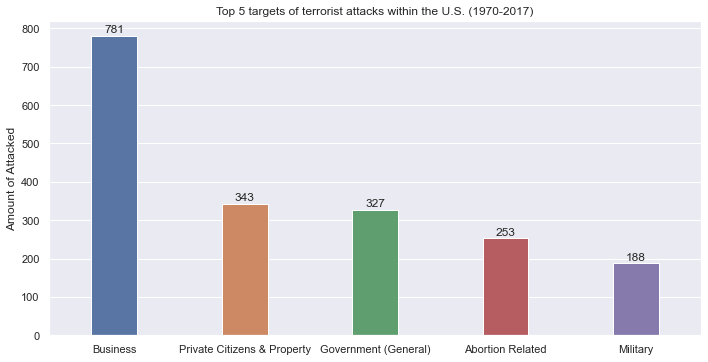

In [38]:
# Plot shwoing top 5 terrorist groups by attack count (1970-2018)
ax = sns.barplot(x = df_us['Target_type'].value_counts().head(5).index, y = df_us['Target_type'].value_counts().head(5))

# Format plot
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 6), 
                   textcoords = 'offset points')
    sns.set(rc={'figure.figsize':(10,5)})

    plt.tight_layout()
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

# Set labels
ax.set(ylabel="Amount of Attacked", title = 'Top 5 targets of terrorist attacks within the U.S. (1970-2017)')
plt.rcParams["axes.labelsize"] = 12
for ax in plt.gcf().axes:
        l = ax.get_title()
        ax.set_title(l, fontsize=12)

plt.show()

In [15]:
business = df_us[df_us['Target_type'] == 'Business']

business = business[business['Motive'].notnull()]

print(business['Motive'].head(50).unique())

['To protest United States owned businesses in Puerto Rico'
 'Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.'
 'The attack occurred during the violent Iowa Beef Packers strike in South Sioux City.'
 'To fight imperialism and exploitation.'
 'To protest the policies of S. I. Hayakawa towards student demonstrators'
 'Protest the Vietnam War and companies profiting from the war'
 'Promote Puerto Rican Independence'
 'Revolutionary movement against the financial establishment'
 'Protest non-local companies from working in East St. Louis'
 'To intimidate/show dissatisfaction with White sympathizers of the African American cause.'
 'Bank of America was perceived to symbolize the "capitalist exploitation of the little man."'
 'Protest the treatment of African Americans in Champaign Illinois'
 'To protest and intimidate the White community of Oxford North Carolina'
 'To protest the White establishment in Oxford North Carolin

In [43]:
PCP = df_us[df_us['Target_type'] == 'Private Citizens & Property']

PCP = PCP[PCP['Motive'].notnull()]

print(PCP['Motive'].head(20).unique())

['The attack occurred during the violent Iowa Beef Packers strike in South Sioux City.'
 'The motive of the attack was to prevent the African American community of West Point Mississippi from organizing.'
 'The attack occurred during the violent Iowa Beef Packers strike.'
 'Protest employees of General Electric who were not union members'
 'Protest Vietnam War and show support for Black Panthers.'
 'Protest anti-integrationists of the Denver City Schools.'
 'Protest the desegregation of Denver City Schools.'
 "To protest Frank Schaeffer's defense of the Cleveland Police Deparment during the 1968 Glenville racial riots"
 'To protest the civil rights movement'
 'Suspected motive was to protest the Vietnam War.' 'Protest the strike'
 "Intimidate pro-Castro sympathizers and protest Fidel Castro's government."
 'Protest the establishment in Ames Iowa.'
 'Protest "river-saving" legislation in St. Charles Missouri.'
 'To protest and intimidate the White community of Oxford North Carolina'
 "P

In [35]:
Gov = df_us[df_us['Target_type'] == 'Government (General)']

Gov = Gov[Gov['Motive'].notnull()]

print(Gov['Motive'].head(20).unique())

['To protest the War in Vietnam and the draft'
 'African American opposition to the school integration plan instituted by the federal government.  The government plan closed two Black schools.'
 'Protest and sabotage the draft'
 'To intimidate/show dissatisfaction with White sympathizers of the African American cause.'
 'To fight imperialism and exploitation.'
 'To disrupt the trial of H. Rap Brown'
 'To protest African Americans sitting on the San Bernardino city council'
 'To protest against the draft.' 'To sabotage the draft'
 'Protest barbershop owners who were not part of the union'
 'Protest the draft' 'Protest the United States government'
 'Protest the policies of the US government']


In [36]:
Abortion = df_us[df_us['Target_type'] == 'Abortion Related']

Abortion = Abortion[Abortion['Motive'].notnull()]

print(Abortion['Motive'].head(20).unique())

['To protest the practice of abortion and to sabotage abortion facilities operating in Minnesota.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Vermont.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Nebraska.'
 'To protest the practice of abortion and to sabotage a clinic offering advise on family planning in Ohio.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Ohio.'
 'To protest pro-abortion activist Bill Baird and to sabotage abortion facilities operating in New York.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Illinois.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Colorado.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Florida.'
 'To protest the practice of abortion and to sabotage abortion facilities operating in Virginia.'
 'To fo

In [103]:
Military = df_us[df_us['Target_type'] == 'Military']

Military = Military[Military['Motive'].notnull()]

print(Military['Motive'].head(20).unique())

['To protest the War in Vietnam and the draft'
 'Protest the draft and Vietnam War'
 'The incident took place during heightened antiwar sentiments in Seattle Washington.'
 'To protest the R.O.T.C. program and the War in Vietnam'
 'To protest the R.O.T.C. program'
 "To protest the University of Oregon's decision to retain the R.O.T.C. program"
 'Protest the War in Vietnam' 'Protest the draft.'
 'Protest secret government research at the University of Illinois and the R.O.T.C. program.'
 'Protest the Vietnam War and the R.O.T.C.'
 'Protest the War in Vietnam and sabotage the draft'
 'Sabotage the US Army war efforts and protest the Vietnam War'
 'To protest United States presence in Puerto Rico and revenge the death of Antonia Martinez Lagares'
 'Protest the R.O.T.C. program and Vietnam War'
 "Protest the government's presence on the University of Illinois campus."
 'Protest the Vietnam War and sabotage the US Army'
 'To impede the US war effort and protest the Vietnam War'
 'To protest 